Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, chi2, SelectKBest
import joblib

Loading the dataset after performing PCA

In [10]:
try:
    df = pd.read_csv('pca_transformed_dataset.csv')
    print("PCA dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'pca_transformed_dataset.csv' not found")
    exit()
X = df.drop('target', axis=1)
y = df['target']

PCA dataset loaded successfully.


Feature Importance (1-Random Forest)

C:\Users\menna\AppData\Local\Temp\ipykernel_7824\1184923900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


Text(0, 0.5, 'Features')

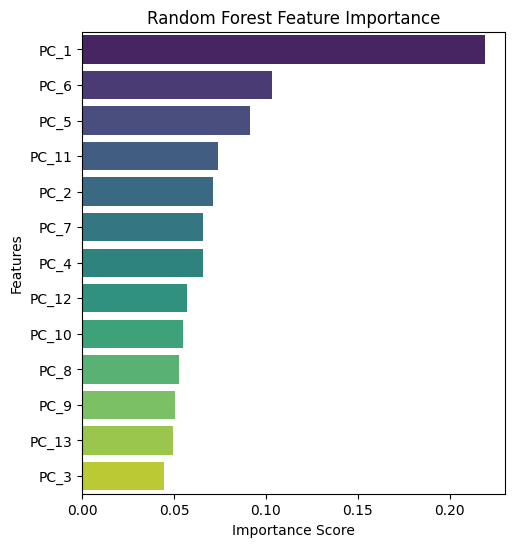

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
# Random Forest Importance
plt.subplot(1, 2, 1)
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')

Feature Importance (2-XGBoost)

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\menna\AppData\Local\Temp\ipykernel_7824\734326184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette='viridis')


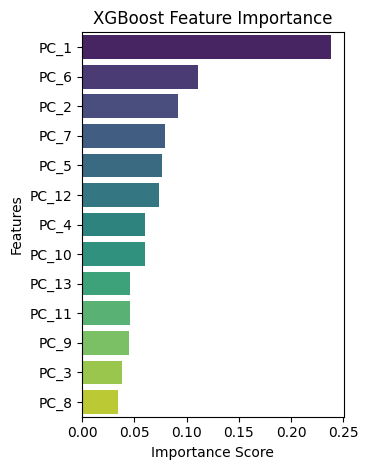

In [13]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X, y)
# Get feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.subplot(1, 2, 2)
sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Applying Recursive Feature Elimination (RFE)


Step 2: Applying Recursive Feature Elimination (RFE)...
RFE Selected Features: ['PC_1', 'PC_2', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_10', 'PC_11', 'PC_12']
   Feature  Ranking  Selected
0     PC_1        1      True
1     PC_2        1      True
3     PC_4        1      True
4     PC_5        1      True
6     PC_7        1      True
5     PC_6        1      True
7     PC_8        1      True
9    PC_10        1      True
11   PC_12        1      True
10   PC_11        1      True
12   PC_13        2     False
8     PC_9        3     False
2     PC_3        4     False


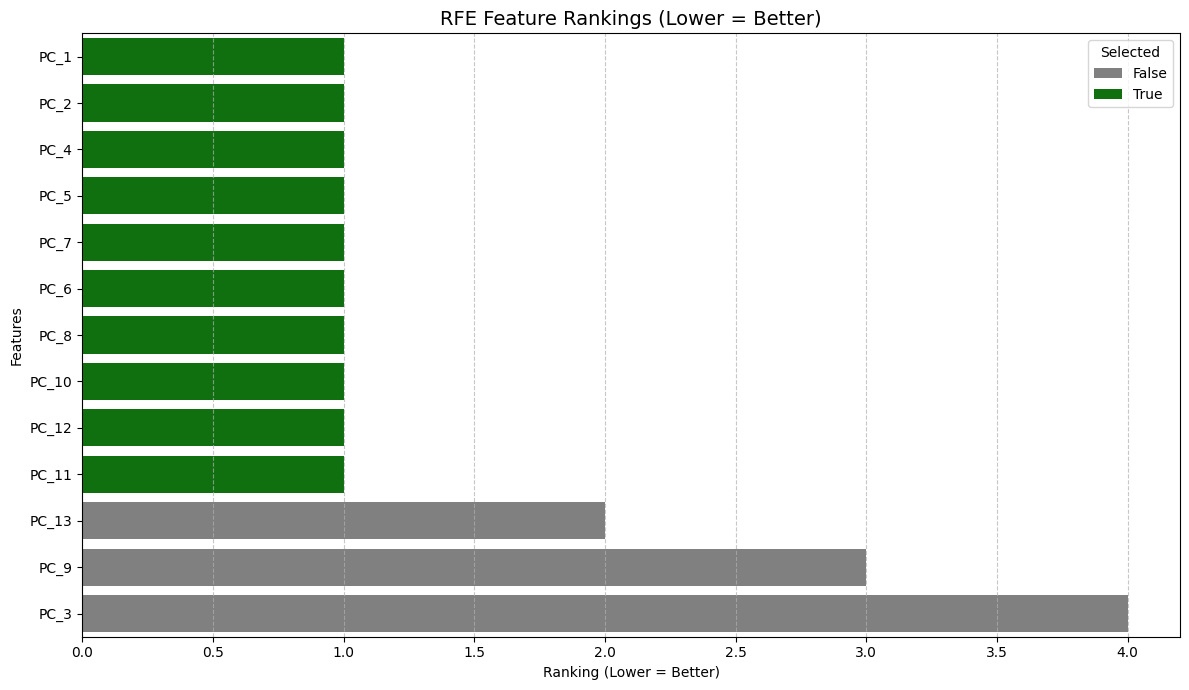

In [22]:
# Use RandomForest as the estimator for RFE
print("\nStep 2: Applying Recursive Feature Elimination (RFE)...")
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_]
print("RFE Selected Features:", rfe_features.tolist())
rfe_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values(by='Ranking')
print(rfe_rankings)
plt.figure(figsize=(12, 7))
sns.barplot(
    data=rfe_rankings,
    x='Ranking',
    y='Feature',
    hue='Selected', 
    dodge=False,
    palette={True: 'green', False: 'gray'}
)
plt.title('RFE Feature Rankings (Lower = Better)', fontsize=14)
plt.xlabel('Ranking (Lower = Better)')
plt.ylabel('Features')
plt.legend(title='Selected')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Chi-Square Test

In [ ]:
X_chi = df.drop('target', axis=1)
X_chi = MinMaxScaler().fit_transform(X_chi)
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_chi, y)
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': chi2_selector.scores_})
print("\nChi-Square Scores for Features:")
print(chi2_scores.sort_values(by='Chi2_Score', ascending=False))
joblib.dump(chi2_selector, 'C:/MENNA_DATA/Heart_Disease_Project/chi_selector.pkl')


Chi-Square Scores for Features:
   Feature  Chi2_Score
0     PC_1    7.260847
5     PC_6    2.536844
1     PC_2    0.684040
3     PC_4    0.598552
6     PC_7    0.536539
4     PC_5    0.536499
8     PC_9    0.063866
7     PC_8    0.024859
9    PC_10    0.015528
10   PC_11    0.012046
12   PC_13    0.011730
11   PC_12    0.000247
2     PC_3    0.000065


['C:/MENNA_DATA/Heart_Disease_Project/chi_selector.pkl']

Selecting the final features

In [26]:
print("\nSelecting final features based on Random Forest importance...")
final_features = importances.index[:12].tolist()
print("Final selected features:", final_features)

df_reduced = df[final_features + ['target']]
df_reduced.to_csv('C:/MENNA_DATA/Heart_Disease_Project/feature_selected_dataset.csv', index=False)
print("\nReduced dataset saved to 'C:/MENNA_DATA/Heart_Disease_Project/feature_selected_dataset.csv'")
print("Shape of reduced dataset:", df_reduced.shape)


Selecting final features based on Random Forest importance...
Final selected features: ['PC_1', 'PC_6', 'PC_5', 'PC_11', 'PC_2', 'PC_7', 'PC_4', 'PC_12', 'PC_10', 'PC_8', 'PC_9', 'PC_13']

Reduced dataset saved to 'C:/MENNA_DATA/Heart_Disease_Project/feature_selected_dataset.csv'
Shape of reduced dataset: (303, 13)
